In [22]:
#see plots in Jupyter
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#make pandas dataframe called "energy", comma as thousands separator, ":" for na_values
#specify dtype for the numeric columns (TIME and Value)
filename = "nrg_ind_334a_1_Data.csv"
energy = pd.read_csv(filename, encoding = "ISO-8859-1", thousands = ",", na_values=":", 
                 dtype={"TIME": np.int, "Value": np.float})

#see head (first rows of data frame)
energy.head(12)

,TIME,GEO,INDIC_NRG,UNIT,Value
0,2006,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1722.2
1,2006,European Union (28 countries),Primary energy consumption,"Index, 2005=100",100.5
2,2006,European Union (28 countries),Primary energy consumption,Percentage,NaN
3,2006,European Union (28 countries),Final Energy Consumption,Million tonnes of oil equivalent (TOE),1193.2
4,2006,European Union (28 countries),Final Energy Consumption,"Index, 2005=100",100.1
5,2006,European Union (28 countries),Final Energy Consumption,Percentage,NaN
6,2006,European Union (28 countries),Distance to target - Primary energy consumption,Million tonnes of oil equivalent (TOE),239.2
7,2006,European Union (28 countries),Distance to target - Primary energy consumption,"Index, 2005=100",NaN
8,2006,European Union (28 countries),Distance to target - Primary energy consumption,Percentage,16.1
9,2006,European Union (28 countries),Distance to target - Final energy consumption,Million tonnes of oil equivalent (TOE),107.2


In [23]:
#get dimensions of data frame (rows, columns)
energy.shape

(4920, 5)

In [24]:
#list data type of each column, number of non-missing values, memory usage
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 5 columns):
TIME         4920 non-null int64
GEO          4920 non-null object
INDIC_NRG    4920 non-null object
UNIT         4920 non-null object
Value        1664 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 192.3+ KB


In [25]:
#see which values in "INDIC_NRG" column exist
energy.INDIC_NRG.unique()

array(['Primary energy consumption', 'Final Energy Consumption',
       'Distance to target - Primary energy consumption',
       'Distance to target - Final energy consumption'], dtype=object)

In [26]:
#see which values in "GEO" column exist
energy.GEO.unique()

array(['European Union (28 countries)', 'Euro area (19 countries)',
       'Belgium', 'Bulgaria', 'Czech Republic', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
       'Iceland', 'Norway', 'Montenegro',
       'Former Yugoslav Republic of Macedonia, the', 'Albania', 'Serbia',
       'Turkey', 'Bosnia and Herzegovina',
       'Kosovo (under United Nations Security Council Resolution 1244/99)',
       'Moldova', 'Ukraine'], dtype=object)

In [27]:
#filter dataframe by means of boolean indexing/ boolean selection: european union, Primary energy consumption, MTOE
eu_crit1 = energy.GEO == "European Union (28 countries)"
eu_crit2 = energy.INDIC_NRG == "Primary energy consumption"
eu_crit3 = energy.UNIT == "Million tonnes of oil equivalent (TOE)"
eu_crit = eu_crit1 & eu_crit2 & eu_crit3
eu_energy = energy.loc[eu_crit]
eu_energy

,TIME,GEO,INDIC_NRG,UNIT,Value
0,2006,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1722.2
492,2007,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1693.8
984,2008,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1692.4
1476,2009,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1598.2
1968,2010,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1656.7
2460,2011,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1594.2
2952,2012,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1585.4
3444,2013,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1569.9
3936,2014,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1508.3
4428,2015,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1529.6


Text(0,0.5,'Million tonnes of oil equivalent (MTOE)')

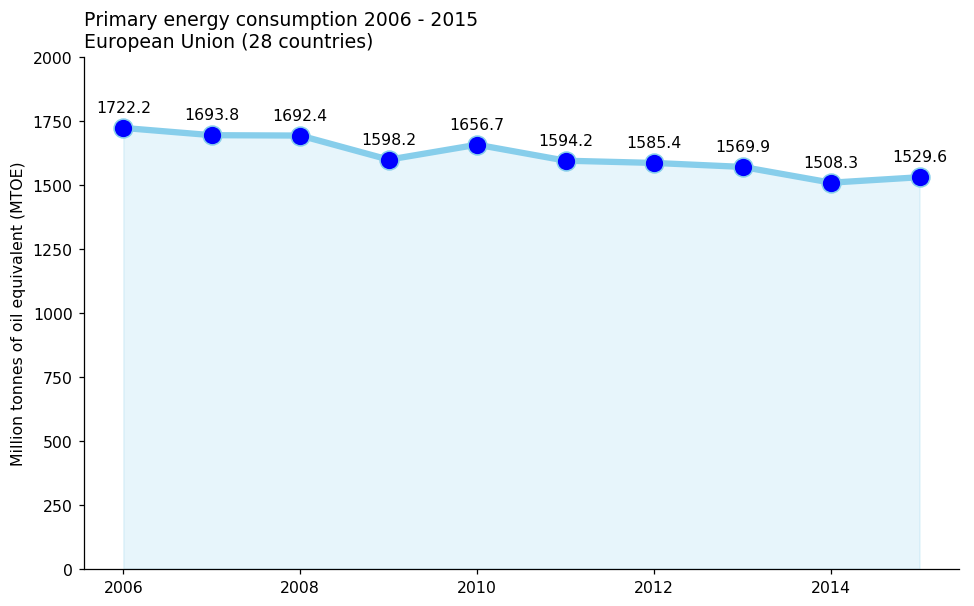

In [29]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 6), dpi=my_dpi)

#make plot
plt.ylim(0, 2000)
plt.fill_between("TIME", "Value", data=eu_energy, color="skyblue", alpha=0.2)
plt.plot("TIME", "Value", data=eu_energy, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4) 
sns.despine()

#add values to the coordinates
for index in eu_energy.index:
    time = eu_energy["TIME"].loc[index]
    value = eu_energy["Value"].loc[index]
    plt.text(time, value + 50, str(value), ha='center', va='bottom')

# Add titles
plt.title("Primary energy consumption 2006 - 2015\nEuropean Union (28 countries)", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("Million tonnes of oil equivalent (MTOE)")

In [30]:
#make pandas dataframe called "gdp", comma as thousands separator, ":" for na_values
#specify type for the numeric columns (TIME and Value)
filename = "nama_10_gdp_1_Data.csv"
gdp = pd.read_csv(filename, encoding = "ISO-8859-1", thousands = ",", na_values=":", 
                 dtype={"TIME": np.int, "Value": np.float})

#see head
gdp.head(12)

,TIME,GEO,UNIT,NA_ITEM,Value,Flag and Footnotes
0,2008,European Union (28 countries),"Chain linked volumes, index 2010=100",Gross domestic product at market prices,102.4,NaN
1,2008,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,13071822.2,NaN
2,2008,European Union (28 countries),"Chain linked volumes (2010), million euro",Gross domestic product at market prices,13134137.5,NaN
3,2008,European Union (15 countries),"Chain linked volumes, index 2010=100",Gross domestic product at market prices,102.4,NaN
4,2008,European Union (15 countries),"Current prices, million euro",Gross domestic product at market prices,12002112.3,NaN
5,2008,European Union (15 countries),"Chain linked volumes (2010), million euro",Gross domestic product at market prices,12100101.1,NaN
6,2008,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...","Chain linked volumes, index 2010=100",Gross domestic product at market prices,102.5,NaN
7,2008,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...","Current prices, million euro",Gross domestic product at market prices,9496501.4,NaN
8,2008,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...","Chain linked volumes (2010), million euro",Gross domestic product at market prices,9655748.1,NaN
9,2008,Euro area (19 countries),"Chain linked volumes, index 2010=100",Gross domestic product at market prices,102.6,NaN


In [31]:
#get dimensions of data frame
gdp.shape

(1320, 6)

In [32]:
#list data type of each column, number of non-missing values, memry usage
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 6 columns):
TIME                  1320 non-null int64
GEO                   1320 non-null object
UNIT                  1320 non-null object
NA_ITEM               1320 non-null object
Value                 1133 non-null float64
Flag and Footnotes    62 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 62.0+ KB


In [33]:
#filter dataframe by means of boolean indexing/ boolean selection: european union, Current prices, million euro, Value > 0
eu_gdp_crit1 = gdp.GEO == "European Union (28 countries)"
eu_gdp_crit2 = gdp.UNIT == "Current prices, million euro"
eu_gdp_crit3 = gdp.Value > 0
eu_gdp_crit = eu_gdp_crit1 & eu_gdp_crit2 & eu_gdp_crit3
eu_gdp = gdp.loc[eu_gdp_crit]
eu_gdp

,TIME,GEO,UNIT,NA_ITEM,Value,Flag and Footnotes
1,2008,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,13071822.2,NaN
133,2009,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,12315808.7,NaN
265,2010,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,12827959.8,NaN
397,2011,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,13200971.1,NaN
529,2012,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,13463405.2,NaN
661,2013,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,13577271.0,NaN
793,2014,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,14044690.5,NaN
925,2015,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,14797443.8,NaN
1057,2016,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,14907852.2,NaN


In [34]:
#from eu_gdp, only show columns: "TIME" and "value"
eu_gdp_tv = eu_gdp[["TIME", "Value"]]
eu_gdp_tv

,TIME,Value
1,2008,13071822.2
133,2009,12315808.7
265,2010,12827959.8
397,2011,13200971.1
529,2012,13463405.2
661,2013,13577271.0
793,2014,14044690.5
925,2015,14797443.8
1057,2016,14907852.2


In [35]:
#from eu_energy, only show columns: "TIME" and "value"
eu_energy_tv = eu_energy[["TIME", "Value"]]
eu_energy_tv

,TIME,Value
0,2006,1722.2
492,2007,1693.8
984,2008,1692.4
1476,2009,1598.2
1968,2010,1656.7
2460,2011,1594.2
2952,2012,1585.4
3444,2013,1569.9
3936,2014,1508.3
4428,2015,1529.6


In [36]:
#merge "eu_energy_tv" and "eu_gdp_tv" along the "TIME" column, only shared "TIME" values ("inner") -> 2008 - 2015
eu_intensity = pd.merge(eu_energy_tv, eu_gdp_tv, on='TIME', how='inner', suffixes=('_energy', '_gdp'))
eu_intensity

,TIME,Value_energy,Value_gdp
0,2008,1692.4,13071822.2
1,2009,1598.2,12315808.7
2,2010,1656.7,12827959.8
3,2011,1594.2,13200971.1
4,2012,1585.4,13463405.2
5,2013,1569.9,13577271.0
6,2014,1508.3,14044690.5
7,2015,1529.6,14797443.8


In [41]:
#add column "intensity" showing primary energy consumption per gdp
eu_intensity["intensity"] = eu_intensity["Value_energy"] / eu_intensity["Value_gdp"] * 1000000
eu_intensity

,TIME,Value_energy,Value_gdp,intensity
0,2008,1692.4,13071822.2,129.469325
1,2009,1598.2,12315808.7,129.768173
2,2010,1656.7,12827959.8,129.147583
3,2011,1594.2,13200971.1,120.763843
4,2012,1585.4,13463405.2,117.756242
5,2013,1569.9,13577271.0,115.627065
6,2014,1508.3,14044690.5,107.392897
7,2015,1529.6,14797443.8,103.369205


Text(0,0.5,'tonnes of oil equivalent (TOE) per million Euro')

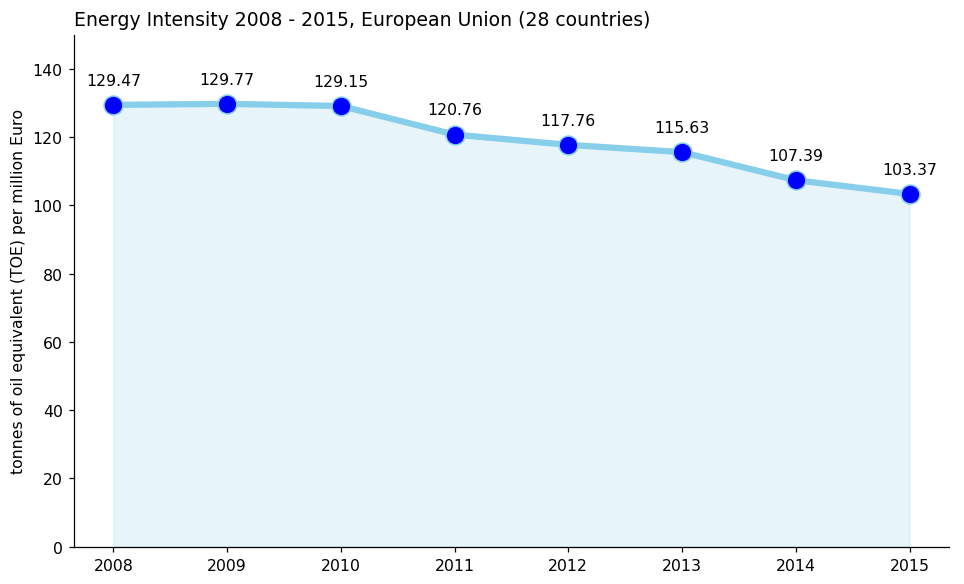

In [55]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 6), dpi=my_dpi)

#make plot
plt.ylim(0, 150)
plt.fill_between("TIME", "intensity", data=eu_intensity, color="skyblue", alpha=0.2)
plt.plot("TIME", "intensity", data=eu_intensity, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4) 
sns.despine()

#add values to the coordinates
for index in eu_intensity.index:
    time = eu_intensity["TIME"].loc[index]
    intensity = round(eu_intensity["intensity"].loc[index], 2)
    plt.text(time, intensity + 5, str(intensity), ha='center', va='bottom')

# Add titles
plt.title("Energy Intensity 2008 - 2015, European Union (28 countries)", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("tonnes of oil equivalent (TOE) per million Euro GDP")

In [56]:
#filter dataframe by means of boolean indexing/ boolean selection: single countries, Primary energy consumption > 0, MTOE, 2015
countries_crit1 = energy.GEO != "European Union (28 countries)"
countries_crit2 = energy.INDIC_NRG == "Primary energy consumption"
countries_crit3 = energy.UNIT == "Million tonnes of oil equivalent (TOE)"
countries_crit4 = energy.TIME == 2015
countries_crit5 = energy.GEO != "Euro area (19 countries)"
countries_crit6 = energy.Value > 0
countries_crit = countries_crit1 & countries_crit2 & countries_crit3 & countries_crit4 & countries_crit5 & countries_crit6
countries_energy = energy.loc[countries_crit]

#replace long country names, sort by value (descending)
countries_energy = countries_energy.replace('Germany (until 1990 former territory of the FRG)', 'Germany')\
    .replace('Former Yugoslav Republic of Macedonia, the', 'Rep. of Macedonia')\
    .replace('Kosovo (under United Nations Security Council Resolution 1244/99)', 'Kosovo')\
    .replace('Bosnia and Herzegovina', 'Bosnia & Herzeg.')\
    .sort_values("Value", ascending=False)
    
countries_energy

,TIME,GEO,INDIC_NRG,UNIT,Value
4500,2015,Germany,Primary energy consumption,Million tonnes of oil equivalent (TOE),292.9
4560,2015,France,Primary energy consumption,Million tonnes of oil equivalent (TOE),239.4
4776,2015,United Kingdom,Primary energy consumption,Million tonnes of oil equivalent (TOE),183.0
4584,2015,Italy,Primary energy consumption,Million tonnes of oil equivalent (TOE),149.6
4860,2015,Turkey,Primary energy consumption,Million tonnes of oil equivalent (TOE),124.9
4548,2015,Spain,Primary energy consumption,Million tonnes of oil equivalent (TOE),117.1
4692,2015,Poland,Primary energy consumption,Million tonnes of oil equivalent (TOE),90.0
4908,2015,Ukraine,Primary energy consumption,Million tonnes of oil equivalent (TOE),85.5
4668,2015,Netherlands,Primary energy consumption,Million tonnes of oil equivalent (TOE),64.3
4452,2015,Belgium,Primary energy consumption,Million tonnes of oil equivalent (TOE),45.7


Text(0,0.5,'')

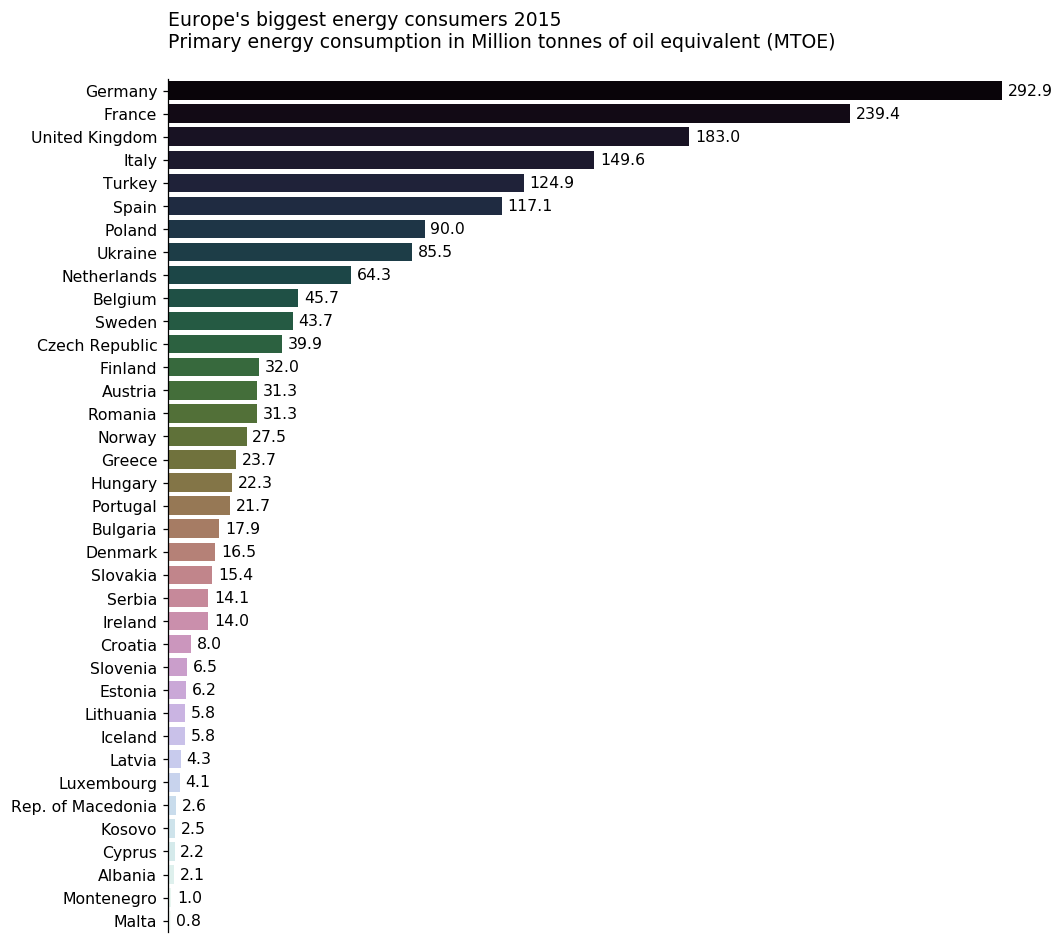

In [57]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 10), dpi=my_dpi)

#make plot
ax = sns.barplot(y=countries_energy.GEO, x=countries_energy.Value, data = countries_energy, palette="cubehelix")
sns.despine()
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)

#Attach a text label right of each bar displaying its length
rects = ax.patches
for rect in rects:
    width = rect.get_width()
    ax.text(width + 2, rect.get_y() + rect.get_height()/2, width, ha='left', va='center')

# Add titles
plt.title("Europe's biggest energy consumers 2015\nPrimary energy consumption in Million tonnes of oil equivalent (MTOE)\n", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("")

In [59]:
gdp

,TIME,GEO,UNIT,NA_ITEM,Value,Flag and Footnotes
0,2008,European Union (28 countries),"Chain linked volumes, index 2010=100",Gross domestic product at market prices,102.4,NaN
1,2008,European Union (28 countries),"Current prices, million euro",Gross domestic product at market prices,13071822.2,NaN
2,2008,European Union (28 countries),"Chain linked volumes (2010), million euro",Gross domestic product at market prices,13134137.5,NaN
3,2008,European Union (15 countries),"Chain linked volumes, index 2010=100",Gross domestic product at market prices,102.4,NaN
4,2008,European Union (15 countries),"Current prices, million euro",Gross domestic product at market prices,12002112.3,NaN
5,2008,European Union (15 countries),"Chain linked volumes (2010), million euro",Gross domestic product at market prices,12100101.1,NaN
6,2008,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...","Chain linked volumes, index 2010=100",Gross domestic product at market prices,102.5,NaN
7,2008,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...","Current prices, million euro",Gross domestic product at market prices,9496501.4,NaN
8,2008,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...","Chain linked volumes (2010), million euro",Gross domestic product at market prices,9655748.1,NaN
9,2008,Euro area (19 countries),"Chain linked volumes, index 2010=100",Gross domestic product at market prices,102.6,NaN


In [64]:
#filter dataframe by means of boolean indexing/ boolean selection: single countries, 2015, , current prices, Value > 0
countries_gdp_crit1 = ~ gdp['GEO'].str.contains("Euro", na=False)
countries_gdp_crit2 = gdp.TIME == 2015
countries_gdp_crit3 = gdp.UNIT == "Current prices, million euro"
countries_gdp_crit4 = gdp.Value >0
countries_gdp_crit = countries_gdp_crit1 & countries_gdp_crit2 & countries_gdp_crit3 & countries_gdp_crit4
countries_gdp = gdp.loc[countries_gdp_crit]

#replace long country names (as used in countries_energy), sort by value (descending)
countries_gdp = countries_gdp.replace('Germany (until 1990 former territory of the FRG)', 'Germany')\
    .replace('Former Yugoslav Republic of Macedonia, the', 'Rep. of Macedonia')\
    .replace('Kosovo (under United Nations Security Council Resolution 1244/99)', 'Kosovo')\
    .replace('Bosnia and Herzegovina', 'Bosnia & Herzeg.')\
    .sort_values("Value", ascending=False)
    
countries_gdp

,TIME,GEO,UNIT,NA_ITEM,Value,Flag and Footnotes
952,2015,Germany,"Current prices, million euro",Gross domestic product at market prices,3043650.0,NaN
1021,2015,United Kingdom,"Current prices, million euro",Gross domestic product at market prices,2602139.6,NaN
967,2015,France,"Current prices, million euro",Gross domestic product at market prices,2194243.0,p
973,2015,Italy,"Current prices, million euro",Gross domestic product at market prices,1652152.5,NaN
964,2015,Spain,"Current prices, million euro",Gross domestic product at market prices,1079998.0,p
1048,2015,Turkey,"Current prices, million euro",Gross domestic product at market prices,772978.8,NaN
994,2015,Netherlands,"Current prices, million euro",Gross domestic product at market prices,683457.0,NaN
1033,2015,Switzerland,"Current prices, million euro",Gross domestic product at market prices,612168.9,p
1018,2015,Sweden,"Current prices, million euro",Gross domestic product at market prices,449014.8,NaN
1000,2015,Poland,"Current prices, million euro",Gross domestic product at market prices,430054.7,NaN


In [65]:
#from countries_gdp, only show columns: "GEO" and "value"
countries_gdp_gv = countries_gdp[["GEO", "Value"]]
countries_gdp_gv

,GEO,Value
952,Germany,3043650.0
1021,United Kingdom,2602139.6
967,France,2194243.0
973,Italy,1652152.5
964,Spain,1079998.0
1048,Turkey,772978.8
994,Netherlands,683457.0
1033,Switzerland,612168.9
1018,Sweden,449014.8
1000,Poland,430054.7


In [66]:
#from countries_energy, only show columns: "GEO" and "value"
countries_energy_gv = countries_energy[["GEO", "Value"]]
countries_energy_gv

,GEO,Value
4500,Germany,292.9
4560,France,239.4
4776,United Kingdom,183.0
4584,Italy,149.6
4860,Turkey,124.9
4548,Spain,117.1
4692,Poland,90.0
4908,Ukraine,85.5
4668,Netherlands,64.3
4452,Belgium,45.7


In [68]:
#merge "countries_energy_gv" and "countries_gdp_gv" along the "GEO" column, only shared "GEO" values ("inner")
countries_intensity = pd.merge(countries_energy_gv, countries_gdp_gv, on='GEO', how='inner', suffixes=('_energy', '_gdp'))
countries_intensity

,GEO,Value_energy,Value_gdp
0,Germany,292.9,3043650.0
1,France,239.4,2194243.0
2,United Kingdom,183.0,2602139.6
3,Italy,149.6,1652152.5
4,Turkey,124.9,772978.8
5,Spain,117.1,1079998.0
6,Poland,90.0,430054.7
7,Netherlands,64.3,683457.0
8,Belgium,45.7,410435.2
9,Sweden,43.7,449014.8


In [70]:
#add column "intensity" showing primary energy consumption per gdp
countries_intensity["intensity"] = countries_intensity["Value_energy"] / countries_intensity["Value_gdp"] * 1000000
countries_intensity = countries_intensity.sort_values("intensity", ascending=False)
countries_intensity


,GEO,Value_energy,Value_gdp,intensity
31,Kosovo,2.5,5806.9,430.522310
21,Serbia,14.1,33491.0,421.008629
18,Bulgaria,17.9,45286.5,395.261281
26,Iceland,5.8,15258.8,380.108528
25,Estonia,6.2,20347.7,304.702743
30,Rep. of Macedonia,2.6,9072.3,286.586643
34,Montenegro,1.0,3624.7,275.884901
10,Czech Republic,39.9,168473.3,236.832780
6,Poland,90.0,430054.7,209.275704
33,Albania,2.1,10217.5,205.529728


Text(0,0.5,'')

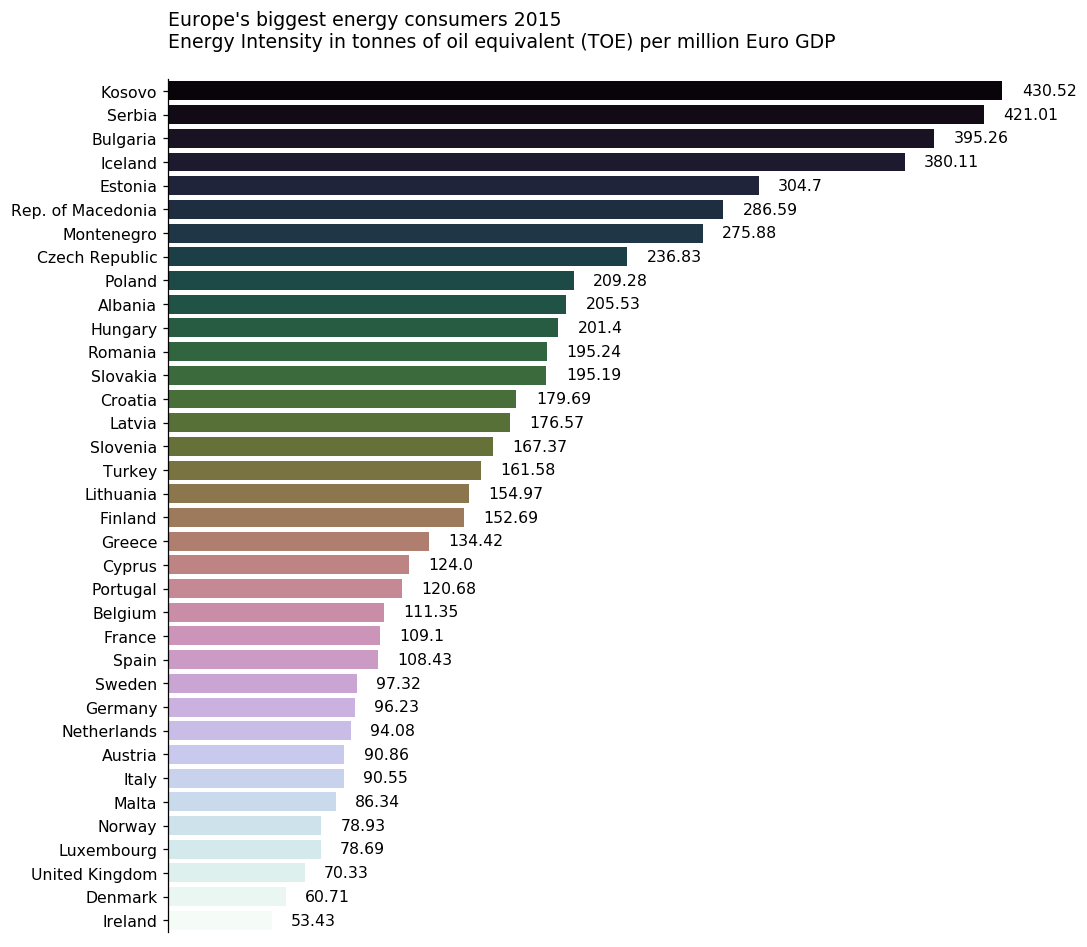

In [74]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 10), dpi=my_dpi)

#make plot
ax = sns.barplot(y=countries_intensity.GEO, x=countries_intensity.intensity, data = countries_intensity, palette="cubehelix")
sns.despine()
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)

#Attach a text label right of each bar displaying its length
rects = ax.patches
for rect in rects:
    width = rect.get_width()
    ax.text(width + 10, rect.get_y() + rect.get_height()/2, round(width, 2), ha='left', va='center')

# Add titles
plt.title("Europe's biggest energy consumers 2015\nEnergy Intensity in tonnes of oil equivalent (TOE) per million Euro GDP\n", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("")